C:\Users\43711\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


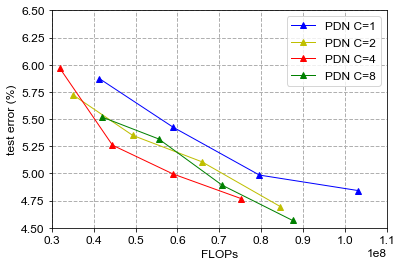

In [52]:
%matplotlib inline
import numpy as np
import os
import os.path

import matplotlib
# matplotlib.use('Agg')
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'

prefix1 = '/home/gh349/denseNet/densenet_pytorch/results/'
prefix2 = '/home/gh349/denseNet/playground/pyCondensedNet/results/'

labels = ['PDN C=1', 'PDN C=2', 
          'PDN C=4', 'PDN C=8']

# all_folders = [
#     [prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C1G4_0', labels[0],
#      prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C1G4_1', labels[0],],
#     [prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C2G4_0', labels[1],
#      prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C2G4_1', labels[1],
#      prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C2G4_2', labels[1],],
#     [prefix1+'cifar10_final_plot/densenet_bc_double_notrans_learned_0', labels[2],
#      prefix1+'cifar10_final_plot/densenet_bc_double_notrans_learned_1', labels[2],
#      prefix1+'cifar10_final_plot/densenet_bc_double_notrans_learned_2', labels[2],],
#     [prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C8G4_0', labels[3],
#      prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C8G4_1', labels[3],
#      prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C8G4_2', labels[3],],
# ]

all_folders = [
    [r'ablation\full_transfactor\condenseresnet\52', labels[0],
     r'ablation\full_transfactor\condenseresnet\64', labels[0],
     r'ablation\full_transfactor\condenseresnet\76', labels[0],
     r'ablation\full_transfactor\condenseresnet\88', labels[0],],

    [r'ablation\full_transfactor\group4trans2\52', labels[1],
     r'ablation\full_transfactor\group4trans2\64', labels[1],
     r'ablation\full_transfactor\group4trans2\76', labels[1],
     r'ablation\full_transfactor\group4trans2\88', labels[1],],

    [r'ablation\full_transfactor\group4trans4\52', labels[2],
     r'ablation\full_transfactor\group4trans4\64', labels[2],
     r'ablation\full_transfactor\group4trans4\76', labels[2],
     r'ablation\full_transfactor\group4trans4\88', labels[2],],

    [r'ablation\full_transfactor\group4trans8\64', labels[3],
     r'ablation\full_transfactor\group4trans8\76', labels[3],
     r'ablation\full_transfactor\group4trans8\88', labels[3],
     r'ablation\full_transfactor\group4trans8\100',labels[3],],
]

colors = {labels[0]: 'b',
          labels[1]: 'y',
          labels[2]: 'r', 
          labels[3]: 'g',}
shape = {labels[0]: '^-',
         labels[1]: '^-',
         labels[2]: '^-', 
         labels[3]: '^-',}

yrange = [4,6]
    
fig = plt.figure(figsize=(6, 4)) 
# fig.subplots_adjust(wspace=0.4)

for folders in all_folders:

    fig = plt.subplot(111)
    
    results = {}

    for n in range(0, len(folders)//2):
    #     print(folders[2*n])

        path = folders[2*n]
        files = os.listdir(path)
#         print(files)

        params = []
        flops = []
        errs = []
        errs_std = []
        for m in range(0, len(files)):
            ff = path+'/'+files[m]
            if os.path.isfile(ff) and ff.endswith('txt'):
                res = np.loadtxt(path+'/'+files[m])
                if res.shape[0] >= 270 and int(files[m].split('_')[-1].split('.')[0]) < 1.5e8:
                    errs.append(res[-5:-1,0].mean())
                    params.append(int(files[m].split('_')[-2].split('.')[0]))
                    flops.append(int(files[m].split('_')[-1].split('.')[0]))

        comp = flops

        idx = np.argsort(comp)
        comp.sort()
        errs = np.asarray(errs)
        errs = errs[idx]
        
        for i in range(len(comp)):
            if not results.get(comp[i], ''):
                results[comp[i]] = [errs[i]]
            else:
                results[comp[i]] += [errs[i]]
#     print(results)
    key = list(results.keys())
    key.sort()
    errs = list(map(lambda x: sum(results[x])/len(results[x]), key))
    
    key = key[:6]
    errs = errs[:6]
    
    plt.plot(key, errs, shape[folders[2*n+1]], linewidth=1.0, label=folders[2*n+1], c=colors[folders[2*n+1]])
#         plt.fill_between(params, errs-errs_std, errs+errs_std, alpha=0.2, edgecolor='#CC4F1B', facecolor='c')
    plt.ylabel('test error (%)')
    plt.xlabel('FLOPs')
#     print(errs_std)

    plt.legend(loc=1)
    plt.ylim([4.5, 6.5])
    plt.xlim([0.3e8, 1.1e8])
    plt.grid(True, linestyle='--', linewidth=1.)
    
    from matplotlib.ticker import FormatStrFormatter
    fig.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    
plt.savefig('condense_factor.pdf', bbox_inches='tight', format='pdf')
plt.show()

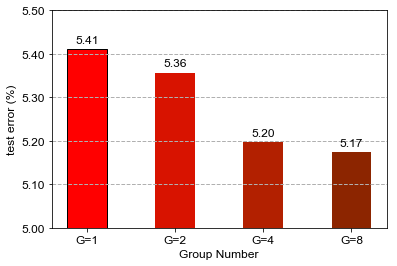

In [71]:
%matplotlib inline
import numpy as np
import os
import os.path

import matplotlib
# matplotlib.use('Agg')
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'

prefix1 = '/home/gh349/denseNet/densenet_pytorch/results/'
prefix2 = '/home/gh349/denseNet/playground/pyCondensedNet/results/'

# all_stats = [
#     [[5.48, 4.77, 4.81], "G1"],
#     [[5.22, 4.85], "G2"],
#     [[4.96, 4.67, 4.81], "G4"],
#     [[4.94, 4.87], "G8"],
# ]

all_stats = [
    [[5.40, 5.46, 5.37], "G=1"],
    [[5.34, 5.33, 5.40], "G=2"],
    [[5.23, 5.16, 5.20], "G=4"],
    [[5.13, 5.19, 5.20], "G=8"],
]

means = [np.mean(l[0]) for l in all_stats]
stds = [np.std(l[0]) for l in all_stats]
labels = [l[1] for l in all_stats]
width = 0.45

# fig = plt.figure(figsize=(6, 4)) 

x_pos = (np.arange(len(all_stats))+width/2)
# fig = plt.subplot(111)
fig, ax = plt.subplots()

rect = ax.bar(x_pos, means, width, 
              color=['r','#D81300','#B22000','#8C2500'], linewidth=1.0, edgecolor='black')
### Error bar
# (_, caps, _) = ax.errorbar(x_pos, means, yerr=stds, color='black', fmt="none", markersize=8, capsize=5)
# for cap in caps:
#     cap.set_markeredgewidth(1)
ax.set_ylabel('test error (%)')
ax.set_xlabel('Group Number')
# plt.rcParams['font.size'] = 12
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_ylim([5,5.5])

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.002*height,
                '%.2f' % float(height),
                ha='center', va='bottom')
autolabel(rect)
ax.yaxis.grid(True, linestyle='--', linewidth=1.)
# from matplotlib.ticker import FormatStrFormatter
# fig.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.savefig('groups.pdf', bbox_inches='tight', format='pdf')

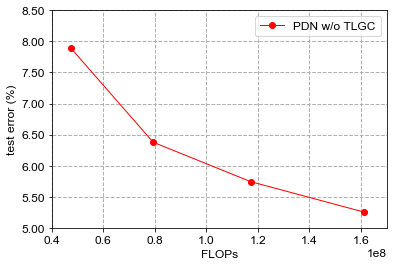

In [87]:
%matplotlib inline
import numpy as np
import os
import os.path

import matplotlib
# matplotlib.use('Agg')
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'

prefix1 = '/home/gh349/denseNet/densenet_pytorch/results/'
prefix2 = '/home/gh349/denseNet/playground/pyCondensedNet/results/'

labels = [ 'DenseNet','PDN w/o TLGC'
         ]

# all_folders = [
#     [prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C1G4_0', labels[0],
#      prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C1G4_1', labels[0],],
#     [prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C2G4_0', labels[1],
#      prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C2G4_1', labels[1],
#      prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C2G4_2', labels[1],],
#     [prefix1+'cifar10_final_plot/densenet_bc_double_notrans_learned_0', labels[2],
#      prefix1+'cifar10_final_plot/densenet_bc_double_notrans_learned_1', labels[2],
#      prefix1+'cifar10_final_plot/densenet_bc_double_notrans_learned_2', labels[2],],
#     [prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C8G4_0', labels[3],
#      prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C8G4_1', labels[3],
#      prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C8G4_2', labels[3],],
# ]

all_folders = [
    [r'dense\dense\28', labels[0],
     r'dense\dense\40', labels[0],
     r'dense\dense\52', labels[0],
     r'dense\dense\64', labels[0],],

    [r'dense\denseres\28', labels[1],
     r'dense\denseres\40', labels[1],
     r'dense\denseres\52', labels[1],
     r'dense\denseres\64', labels[1],
#     r'dense\denseres\52', labels[1],
    ],


]

colors = {labels[0]: 'b',
          labels[1]: 'r',
         }
shape = {labels[0]: 'o-',
         labels[1]: 'o-',
         }

yrange = [4,6]
    
fig = plt.figure(figsize=(6, 4)) 
# fig.subplots_adjust(wspace=0.4)

for folders in all_folders:

    fig = plt.subplot(111)
    
    results = {}

    for n in range(0, len(folders)//2):
    #     print(folders[2*n])

        path = folders[2*n]
        files = os.listdir(path)
#         print(files)

        params = []
        flops = []
        errs = []
        errs_std = []
        for m in range(0, len(files)):
            ff = path+'/'+files[m]
            if os.path.isfile(ff) and ff.endswith('txt'):
                res = np.loadtxt(path+'/'+files[m])
                if res.shape[0] >= 270 and int(files[m].split('_')[-1].split('.')[0]) < 1.7e8:
                    errs.append(res[-5:-1,0].mean())
                    params.append(int(files[m].split('_')[-2].split('.')[0]))
                    flops.append(int(files[m].split('_')[-1].split('.')[0]))

        comp = flops

        idx = np.argsort(comp)
        comp.sort()
        errs = np.asarray(errs)
        errs = errs[idx]
        
        for i in range(len(comp)):
            if not results.get(comp[i], ''):
                results[comp[i]] = [errs[i]]
            else:
                results[comp[i]] += [errs[i]]
#     print(results)
    key = list(results.keys())
    key.sort()
    errs = list(map(lambda x: sum(results[x])/len(results[x]), key))
    
    key = key[:6]
    errs = errs[:6]
    
    plt.plot(key, errs, shape[folders[2*n+1]], linewidth=1.0, label=folders[2*n+1], c=colors[folders[2*n+1]])
#         plt.fill_between(params, errs-errs_std, errs+errs_std, alpha=0.2, edgecolor='#CC4F1B', facecolor='c')
    plt.ylabel('test error (%)')
    plt.xlabel('FLOPs')
#     print(errs_std)

    plt.legend(loc=1)
    plt.ylim([5., 8.5])
    plt.xlim([0.4e8, 1.7e8])
    plt.grid(True, linestyle='--', linewidth=1.)
    
    from matplotlib.ticker import FormatStrFormatter
    fig.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    
plt.savefig('condense_factor.pdf', bbox_inches='tight', format='pdf')
plt.show()

C:\Users\43711\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


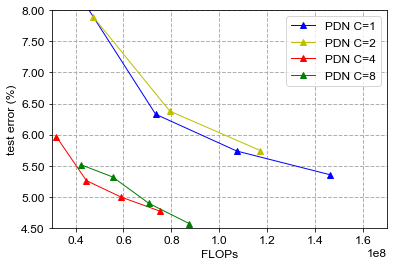

In [24]:
%matplotlib inline
import numpy as np
import os
import os.path

import matplotlib
# matplotlib.use('Agg')
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'

prefix1 = '/home/gh349/denseNet/densenet_pytorch/results/'
prefix2 = '/home/gh349/denseNet/playground/pyCondensedNet/results/'

labels = ['PDN C=1', 'PDN C=2', 
          'PDN C=4', 'PDN C=8']

# all_folders = [
#     [prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C1G4_0', labels[0],
#      prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C1G4_1', labels[0],],
#     [prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C2G4_0', labels[1],
#      prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C2G4_1', labels[1],
#      prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C2G4_2', labels[1],],
#     [prefix1+'cifar10_final_plot/densenet_bc_double_notrans_learned_0', labels[2],
#      prefix1+'cifar10_final_plot/densenet_bc_double_notrans_learned_1', labels[2],
#      prefix1+'cifar10_final_plot/densenet_bc_double_notrans_learned_2', labels[2],],
#     [prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C8G4_0', labels[3],
#      prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C8G4_1', labels[3],
#      prefix2+'cifar10_final_plot/densenet_bc_double_notrans_learned_C8G4_2', labels[3],],
# ]

all_folders = [
    [r'dense\dense\28', labels[0],
     r'dense\dense\40', labels[0],
     r'dense\dense\52', labels[0],
     r'dense\dense\64', labels[0],],

    [r'dense\denseres\28', labels[1],
     r'dense\denseres\40', labels[1],
     r'dense\denseres\52', labels[1],
     r'dense\denseres\64', labels[1],],

    [r'ablation\full_transfactor\group4trans4\52', labels[2],
     r'ablation\full_transfactor\group4trans4\64', labels[2],
     r'ablation\full_transfactor\group4trans4\76', labels[2],
     r'ablation\full_transfactor\group4trans4\88', labels[2],],

    [r'ablation\full_transfactor\group4trans8\64', labels[3],
     r'ablation\full_transfactor\group4trans8\76', labels[3],
     r'ablation\full_transfactor\group4trans8\88', labels[3],
     r'ablation\full_transfactor\group4trans8\100',labels[3],],
]

colors = {labels[0]: 'b',
          labels[1]: 'y',
          labels[2]: 'r', 
          labels[3]: 'g',}
shape = {labels[0]: '^-',
         labels[1]: '^-',
         labels[2]: '^-', 
         labels[3]: '^-',}

yrange = [4,6]
    
fig = plt.figure(figsize=(6, 4)) 
# fig.subplots_adjust(wspace=0.4)

for folders in all_folders:

    fig = plt.subplot(111)
    
    results = {}

    for n in range(0, len(folders)//2):
    #     print(folders[2*n])

        path = folders[2*n]
        files = os.listdir(path)
#         print(files)

        params = []
        flops = []
        errs = []
        errs_std = []
        for m in range(0, len(files)):
            ff = path+'/'+files[m]
            if os.path.isfile(ff) and ff.endswith('txt'):
                res = np.loadtxt(path+'/'+files[m])
                if res.shape[0] >= 270 and int(files[m].split('_')[-1].split('.')[0]) < 1.5e8:
                    errs.append(res[-5:-1,0].mean())
                    params.append(int(files[m].split('_')[-2].split('.')[0]))
                    flops.append(int(files[m].split('_')[-1].split('.')[0]))

        comp = flops

        idx = np.argsort(comp)
        comp.sort()
        errs = np.asarray(errs)
        errs = errs[idx]
        
        for i in range(len(comp)):
            if not results.get(comp[i], ''):
                results[comp[i]] = [errs[i]]
            else:
                results[comp[i]] += [errs[i]]
#     print(results)
    key = list(results.keys())
    key.sort()
    errs = list(map(lambda x: sum(results[x])/len(results[x]), key))
    
    key = key[:6]
    errs = errs[:6]
    
    plt.plot(key, errs, shape[folders[2*n+1]], linewidth=1.0, label=folders[2*n+1], c=colors[folders[2*n+1]])
#         plt.fill_between(params, errs-errs_std, errs+errs_std, alpha=0.2, edgecolor='#CC4F1B', facecolor='c')
    plt.ylabel('test error (%)')
    plt.xlabel('FLOPs')
#     print(errs_std)

    plt.legend(loc=1)
    plt.ylim([4.5, 8.])
    plt.xlim([0.3e8, 1.7e8])
    plt.grid(True, linestyle='--', linewidth=1.)
    
    from matplotlib.ticker import FormatStrFormatter
    fig.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    
plt.savefig('condense_factor.pdf', bbox_inches='tight', format='pdf')
plt.show()

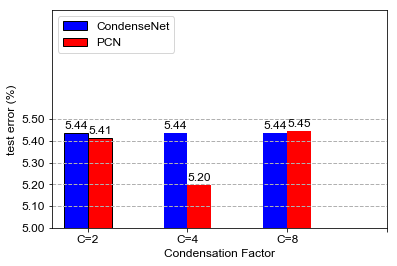

In [86]:
%matplotlib inline
import numpy as np
import os
import os.path

import matplotlib
# matplotlib.use('Agg')
from matplotlib import rcParams
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'

prefix1 = '/home/gh349/denseNet/densenet_pytorch/results/'
prefix2 = '/home/gh349/denseNet/playground/pyCondensedNet/results/'

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.002*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

all_stats = [
    [[5.44, 5.49, 5.38], "C1"], #compactnet_learn_nT_522938_66390570.txt
    [[5.45, 5.41, 5.38], "C=2"], #compactnet_learn_nT_318650_41224746.txt
    [[5.23, 5.20, 5.16], "C=4"], #densenet_bc_notrans_learned_216506_28641834.txt
    [[5.43, 5.44, 5.47], "C=8"], #
]

all_pruned = [
    [[6.00, 6.08, 6.29], "CF2"], #compactnet_learn_nT_318650_41224746.txt
    [[7.74, 7.47, 7.59], "CF4"], #densenet_bc_notrans_learned_216506_28641834.txt
    [[8.81, 8.60, 8.39], "CF8"], #
]

means = [np.mean(l[0]) for l in all_stats]
stds = [np.std(l[0]) for l in all_stats]
labels = [l[1] for l in all_stats]
width = 0.24

fig = plt.figure() 

fig, ax = plt.subplots(figsize=(6, 4))


means = [np.mean(l[0]) for l in [all_stats[0]]*3]
stds = [np.std(l[0]) for l in [all_stats[0]]*3]

rect = ax.bar(np.arange(len(all_stats)-1), means, width, color=['b','b','b'], label='CondenseNet', linewidth=1.0, edgecolor='black')
### Error bar
# (_, caps, _) = ax.errorbar(np.arange(len(all_stats)-1)-width/2, means, yerr=stds, color='black', fmt="none", markersize=8, capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)
autolabel(rect)



means = [np.mean(l[0]) for l in all_stats[1:]]
stds = [np.std(l[0]) for l in all_stats[1:]]
labels = [l[1] for l in all_stats[1:]]

rect = ax.bar(np.arange(len(all_stats)-1)+width, means, width, color=['r','r','r'], label='PCN', linewidth=1.0, edgecolor='black')
### Error bar
# (_, caps, _) = ax.errorbar(np.arange(len(all_stats)-1)+width/2, means, yerr=stds, color='black', fmt="none", markersize=8, capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)
ax.set_ylabel('test error (%)')
ax.set_xlabel('Condensation Factor')
ax.set_xticks(np.arange(len(all_stats)) + width / 2)
ax.set_xticklabels(labels)
autolabel(rect)



# means = [np.mean(l[0]) for l in all_pruned]
# stds = [np.std(l[0]) for l in all_pruned]

# rect = ax.bar(np.arange(len(all_stats)-1)+width/2*3, means, width, color=['orange','orange','orange'], label='Traditional Pruning', linewidth=1.0, edgecolor='black')
# ### Error bar
# (_, caps, _) = ax.errorbar(np.arange(len(all_stats)-1)+width/2*3, means, yerr=stds, color='black', fmt="none", markersize=8, capsize=5)
# for cap in caps:
#     cap.set_markeredgewidth(1)
# autolabel(rect)

ax.legend(loc=2)

ax.set_ylim([5., 6.])
ax.yaxis.set_ticks(np.arange(5, 5.6, 0.1))
ax.yaxis.grid(True, linestyle='--', linewidth=1.)

    
from matplotlib.ticker import FormatStrFormatter
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.savefig('pruned.pdf', bbox_inches='tight', format='pdf')